============== 1/16 ==============
epoch:0 | 0.117 - 0.128


/Users/okihayas/Study/deep_learning_from_zero/common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/okihayas/Study/deep_learning_from_zero/common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/okihayas/Study/deep_learning_from_zero/common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
/Users/okihayas/Study/deep_learning_from_zero/common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:1 | 0.097 - 0.143
epoch:2 | 0.097 - 0.143
epoch:3 | 0.097 - 0.167
epoch:4 | 0.097 - 0.179
epoch:5 | 0.097 - 0.198
epoch:6 | 0.097 - 0.23
epoch:7 | 0.097 - 0.24
epoch:8 | 0.097 - 0.253
epoch:9 | 0.097 - 0.276
epoch:10 | 0.097 - 0.293
epoch:11 | 0.097 - 0.316
epoch:12 | 0.097 - 0.327
epoch:13 | 0.097 - 0.348
epoch:14 | 0.097 - 0.358
epoch:15 | 0.097 - 0.388
epoch:16 | 0.097 - 0.4
epoch:17 | 0.097 - 0.406
epoch:18 | 0.097 - 0.42
epoch:19 | 0.097 - 0.439
============== 2/16 ==============
epoch:0 | 0.117 - 0.138
epoch:1 | 0.097 - 0.104
epoch:2 | 0.097 - 0.108
epoch:3 | 0.097 - 0.133
epoch:4 | 0.097 - 0.163
epoch:5 | 0.097 - 0.179
epoch:6 | 0.097 - 0.2
epoch:7 | 0.097 - 0.222
epoch:8 | 0.097 - 0.254
epoch:9 | 0.097 - 0.272
epoch:10 | 0.097 - 0.3
epoch:11 | 0.097 - 0.318
epoch:12 | 0.097 - 0.342
epoch:13 | 0.097 - 0.369
epoch:14 | 0.097 - 0.382
epoch:15 | 0.097 - 0.415
epoch:16 | 0.097 - 0.423
epoch:17 | 0.097 - 0.433
epoch:18 | 0.097 - 0.456
epoch:19 | 0.097 - 0.479
============== 3/1

epoch:17 | 0.117 - 0.544
epoch:18 | 0.117 - 0.604
epoch:19 | 0.117 - 0.607


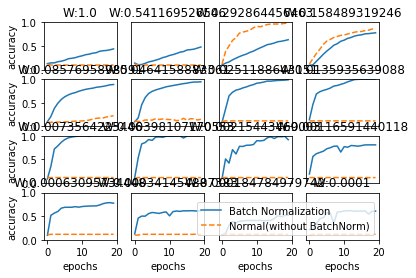

In [1]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()